# Домашнее задание №2

## Выполнил: Сорочайкин Александр Ярославович, СКБ223

## Импорт необходимых библиотек

In [1235]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, gamma, norm, poisson, expon, chi2

## Условия

Дискретное распределение - **Биномиальное распределение**, далее - $\mathscr{L}_{d}$

$$f(x) = C_{n}^{x}p^{x}(1 - p)^{n - x},\ x\in{0,1,...,n},\ n\in\mathbb{N},\ 0<p<1,\ 1 - p = q$$

Непрерывное распределение - **Гамма распределение**, далее - $\mathscr{L}_{c}$

$$f(x) = \frac{\theta^{\alpha}x^{\alpha - 1}e^{-\theta x}}{\Gamma(\alpha)},\ x,\theta,\alpha \in \mathbb{R}^{+}$$

Второй вариант записи, используемый в работе:  
$$f(x) = \frac{x^{\alpha}e^{-\frac{x}{\beta}}}{\Gamma(\alpha)\beta^{\alpha + 1}}$$

## Основные понятия и определения

- **Функция распределения случайной величины** $\xi\ F_{\xi}(x)$ - это функция, определенная для любого действительного х и выражающая вероятность того, что случайная величина $\xi$ примет значение, меньшее х:

- **Медиана распределения** (медиана случайной величины $\xi$) - это такое число $x_{med}$, такое, что $P(\xi < x_{med}) = P(\xi > x_{med}) = \frac{1}{2}$

- **Квантиль**ю распределения уровня $\gamma$ или $\gamma$-квантилью непрерывной случайной величины $\xi$ с функцией распределения $F(x)$ называется такое возможное значение $x_{\gamma}$ этой случайной величины, для которого вероятность события $\xi < x_{\gamma}$ равна заданной величине $\gamma$: $P(\xi < x_{\gamma}) = \gamma,\ 0 < \gamma < 1$. 

- **Математическое ожидание:**
  1. Математическим ожиданием дискретной случайной величины $\xi$ называется число: $$M\xi=\sum\limits_{i = 1}^{n}x_{i}p_{i}$$
  2. В случае, если множество значений случайной величины $\xi$ бесконечно, т.е. счетно, то математическое ожидание определяется как бесконечный ряд: $$M\xi=\sum\limits_{i = 1}^{\infty}x_{i}p_{i}$$
  3. Математическое ожидание для непрерывно распределенных случайных величин определяется по формуле:
  $$M\xi=\int\limits_{-\infty}^{\infty}xp_{\xi}(x)dx$$

- **Дисперсией** случайной величины $\xi$ называется число $D\xi = M(\xi - M\xi)^{2}$

- **k-й момент случайной величины $\xi$** - это математическое ожидание k-ой степени случайной величины, т.е. $M\xi^{k}$ 

- **k-й центральный момент случайной величины $\xi$** - это математическое ожидание случайной величины $(\xi-M\xi)^{k}$ т.е. $M(\xi-M\xi)^k$


- **k-й факториальный момент случайной величины $\xi$** - это математическое ожидание случайной величины $\xi^{[k]}$, т.е $M\xi(\xi - 1)(\xi - 2)...(\xi - k + 1)$

- **Мода распределения** - модой случайной величины называется ее наиболее вероятное значение.


- **Производящая функция для дискретных неотрицательных целочисленных случайных величин -** это ряд следующего вида: $$f_{\xi}(s)=Ms^{\xi}=\sum\limits_{r = 0}^{\infty}P(\xi = r)s^{r}$$

- **Характеристическая функция** - это функция вида: $f(t) = M(e^{it\xi}),\ t\in\mathbb{R}$

## Примеры событий и взаимосвязи для распределений $\mathscr{L}_{d}$ и $\mathscr{L}_{c}$

### Примеры интерпретаций распределений

#### Биномиальное распределение $\mathscr{L}_{d}$

##### Эксперимент 1

 Бросание монеты: вероятность получения орла k раз из n бросков. Пусть монета симметричная, тогда $\theta = 1 - \theta = \frac{1}{2}$. Тогда: $P(x = k) = С_{n}^{k}*\theta^{k}*(1-\theta)^{n - k} = C_{n}^{k}*\frac{1}{2}^{n}$.  
 Продемонстрируем это на практике:

Зададим параметры для нашего распределения:

In [1260]:
n = 10  
p = 0.5  

Также укажем количество повторений нашего эксперимента

In [1262]:
num_experiments = 10000  

Проведем нашу серию экспериментов. В массиве samples будет храниться количество выпавших орлов в каждом из экспериментов

In [1264]:
samples = np.random.binomial(n, p, num_experiments)

In [1265]:
samples[120:134]

array([6, 6, 2, 4, 5, 5, 3, 4, 3, 4, 4, 6, 6, 4])

Построим гистограмму для полученых нами результатов, А также добавим на этот график теоретически вычесленные значения вероятностей для каждого возможного исхода

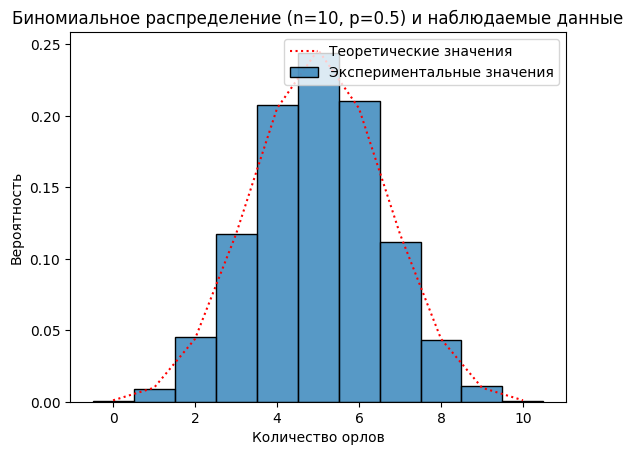

In [1267]:
sns.histplot(samples, bins=np.arange(n+2)-0.5, kde=False, stat='probability', label='Экспериментальные значения')

# Теоретические биномиальные вероятности
x = np.arange(0, n+1)
pmf = binom.pmf(x, n, p)

# Построение теоретических значений
plt.plot(x, pmf, ':', color='red', label='Теоретические значения')

# Добавление подписей и легенды
plt.xlabel('Количество орлов')
plt.ylabel('Вероятность')
plt.legend()
plt.title(f'Биномиальное распределение (n={n}, p={p}) и наблюдаемые данные')
plt.show()

##### Эксперимент 2

Подбрасывание кубика: вероятность получения k раз значения 5 из n бросков. Вероятность выпадения значения 5 равна: $\theta = \frac{1}{6}$, тогда: $С_{n}^{k}*\theta^{k}*(1-\theta)^{n - k} = C_{n}^{k}*\frac{1}{6}^{k}*\frac{5}{6}^{n - k}$   
Продемонстрируем это на практике:

In [1270]:
n = 10  
p = 1/6  
num_experiments = 10000

In [1271]:
samples = np.random.binomial(n, p, num_experiments)

In [1272]:
samples[120:134]

array([3, 2, 3, 4, 2, 1, 2, 3, 1, 3, 2, 1, 2, 2])

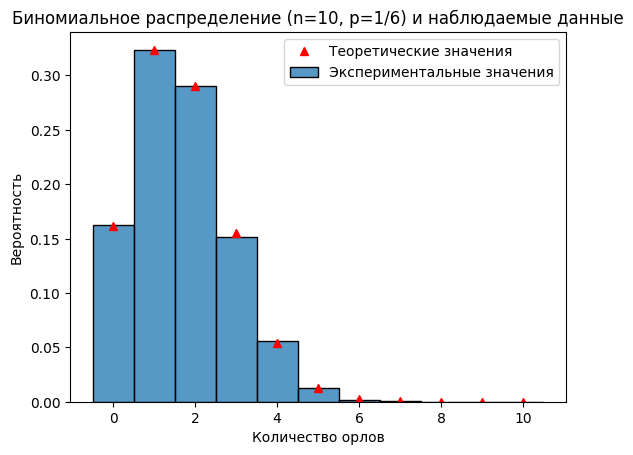

In [1273]:
sns.histplot(samples, bins=np.arange(n+2)-0.5, kde=False, stat='probability', label='Экспериментальные значения')

# Теоретические биномиальные вероятности
x = np.arange(0, n+1)
pmf = binom.pmf(x, n, p)

# Построение теоретических значений
plt.plot(x, pmf, '^', color='red', label='Теоретические значения')

# Добавление подписей и легенды
plt.xlabel('Количество орлов')
plt.ylabel('Вероятность')
plt.legend()
plt.title(f'Биномиальное распределение (n={n}, p=1/6) и наблюдаемые данные')
plt.show()

#### Гамма распределение $\mathscr{L}_{c}$

Предположим, что норма прибыли от инвестиций за некоторый период времени соответствует гамма-распределению. Это может быть обосновано тем, что совокупная прибыль от нескольких независимых небольших инвестиций, каждая из которых имеет экспоненциальное распределение прибыли, будет соответствовать гамма-распределению. Покажем это на практике:

Зададим параметры, а также количество экспериментов, где  
- $\alpha$ - количество независимых инвестиций
- $\theta$ - средняя прибыль от одной инвестиции

In [1277]:
alpha = 5.0    
theta = 1.0 
num_samples = 10000

Проведем нашу серию экспериментов. В массиве samples будет храниться значение нормы прибыли в каждом из экспериментов

In [1279]:
samples = np.random.gamma(alpha, theta, num_samples)
samples[1231:1240]

array([3.20172447, 4.67146872, 7.38927   , 2.83963777, 7.26377739,
       2.18279925, 4.82373922, 7.03587174, 4.59868135])

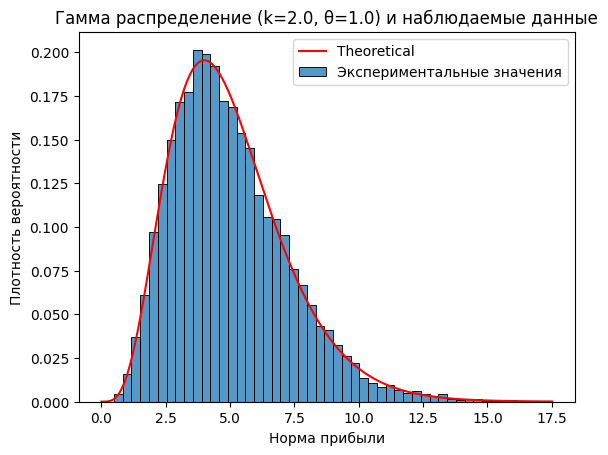

In [1280]:
sns.histplot(samples, bins=50, kde=False, stat='density', label='Экспериментальные значения')

x = np.linspace(0, np.max(samples), 1000)

pdf = gamma.pdf(x, alpha, scale=theta)
plt.plot(x, pdf, 'r-', label='Theoretical')

plt.xlabel('Норма прибыли')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.title(f'Гамма распределение (k={k}, θ={theta}) и наблюдаемые данные')
plt.show()

### Соотношения с другими распределениями

#### Биномиальное распределение

##### Аппроксимация нормальным распределением

Биномиальное распределение с параметрами n и p может быть аппроксимировано нормальным распределением со средним np и стандартным отклонением $\frac{np(1-p)}{2}$, если только выполняются условия $np(1-p)>5\ и\ 0,1≤p≤0,9$. При условии $np(1-p)>25$ эту аппроксимацию можно применять независимо от значения p.

Зададим параметры обоих распределений, а также количество повторений эксперимента

In [1286]:
n = 1000    
p = 0.5    

num_samples = 100000

mu = n * p  
sigma = np.sqrt(n * p * (1 - p)) 

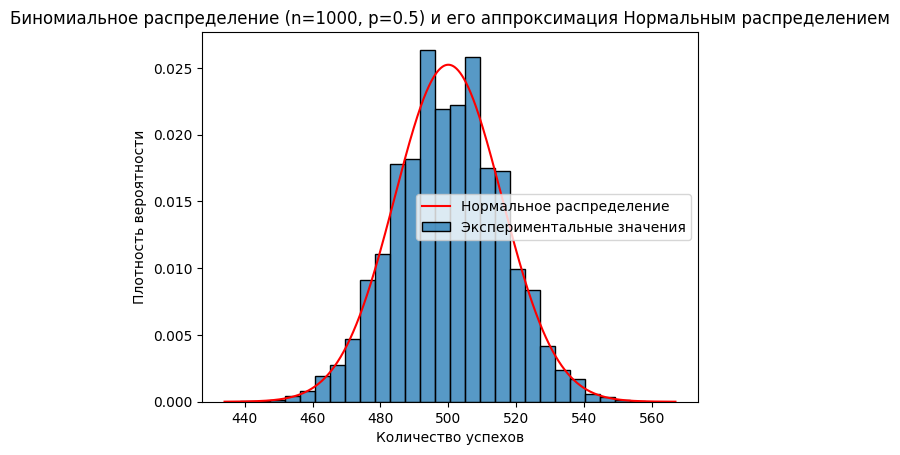

In [1287]:
samples = np.random.binomial(n, p, num_samples)
sns.histplot(samples, bins=30, kde=False, stat='density', label='Экспериментальные значения')

x = np.linspace(np.min(samples), np.max(samples), 1000)
pdf = norm.pdf(x, mu, sigma)

plt.plot(x, pdf, 'r-', label='Нормальное распределение')

plt.xlabel('Количество успехов')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.title(f'Биномиальное распределение (n={n}, p={p}) и его аппроксимация Нормальным распределением')
plt.show()


##### Аппроксимация распределением Пуассона

Биномиальное распределение с параметрами $n\ и \ p$ может быть аппроксимировано распределением Пуассона со средним $np$ при условии, что $p<0,1$ и $n$ достаточно велико.

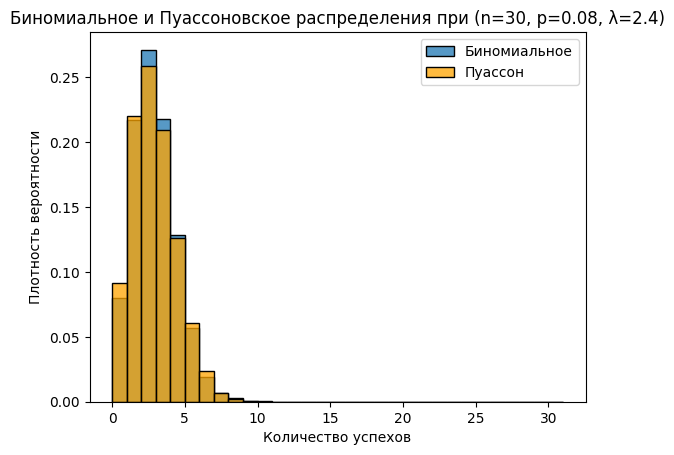

In [1290]:
n = 30  
p = 0.08   

num_samples = 10000

binomial_samples = np.random.binomial(n, p, num_samples)

lambda_ = n * p
poisson_samples = np.random.poisson(lambda_, num_samples)

sns.histplot(binomial_samples, bins=range(n+2), kde=False, stat='density', label='Биномиальное')

sns.histplot(poisson_samples, bins=range(n+2), kde=False, stat='density', color='orange', label='Пуассон')

plt.xlabel('Количество успехов')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.title(f'Биномиальное и Пуассоновское распределения при (n={n}, p={p}, λ={lambda_})')
plt.show()

##### Связь Биномиального распределения и Бернулли

Случайная величина $𝑋$ имеет распределение Бернулли, если она принимает всего два значения: 1 и 0 с вероятностями $p\ и\ q = 1 - p$ соответственно.  
Таким образом, биномиальное распределение при количестве испытаний n = 1 является распределением Бернулли.  
И наоборот, любое биномиальное распределение, $B(n, p)$, является распределением суммы n независимых испытаний Бернулли, Бернулли(p), каждое с одинаковой вероятностью p.

In [1293]:
##### Мб что-то про Муавра-Лапласа, предельную теорему Пуассона, связь с бета-распределением?

#### Гамма распределение

##### Связь с экспоненциальным распределением

Экспоненциальное распределение является частным случаем гамма-распределения: $\Gamma(1,\frac{1}{\lambda})\sim Exp(\lambda)$  
Продемонстрируем на практике:

In [1297]:
alpha = 1  
theta = 0.9
lambda_ = 1 / theta  
num_samples = 10000

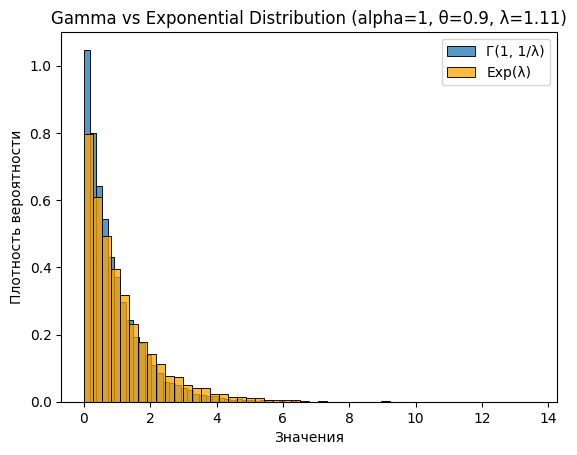

In [1298]:
gamma_samples = np.random.gamma(alpha, theta, num_samples)

expon_samples = np.random.exponential(lambda_, num_samples)

sns.histplot(gamma_samples, bins=50, kde=False, stat='density', label='Г(1, 1/λ)')

sns.histplot(expon_samples, bins=50, kde=False, stat='density', color='orange', label='Exp(λ)')

plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.title(f'Gamma vs Exponential Distribution (alpha={alpha}, θ={theta}, λ={round(lambda_, 2)})')
plt.show()

##### Связь с распределением Хи-квадрат

Распределение Хи-квадрат является частным случаем гамма распределения:
$\Gamma(\frac{n}{2},2)\sim\chi^{2}(n)$

In [1301]:
df = 5   
alpha = df / 2   
theta = 2.0   

num_samples = 10000

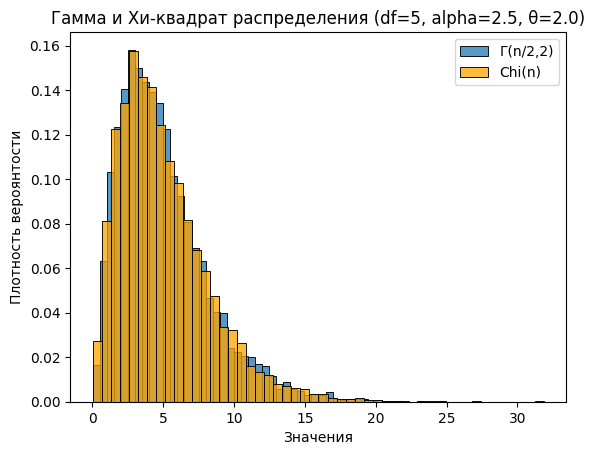

In [1302]:
gamma_samples = np.random.gamma(alpha, theta, num_samples)

chi2_samples = np.random.chisquare(df, num_samples)

sns.histplot(gamma_samples, bins=50, kde=False, stat='density', label='Г(n/2,2)')

sns.histplot(chi2_samples, bins=50, kde=False, stat='density', color='orange', label='Chi(n)')

plt.xlabel('Значения')
plt.ylabel('Плотность вероянтости')
plt.legend()
plt.title(f'Гамма и Хи-квадрат распределения (df={df}, alpha={alpha}, θ={theta})')
plt.show()

##### Приближение гамма - распределения с помощью нормального распределения

$\Gamma(\alpha,\theta)\sim N(\alpha\theta,\alpha\theta^{2}),\ при\ \alpha\to\infty$ 

In [1305]:
alpha = 1000   
theta = 0.1  
num_samples = 10000

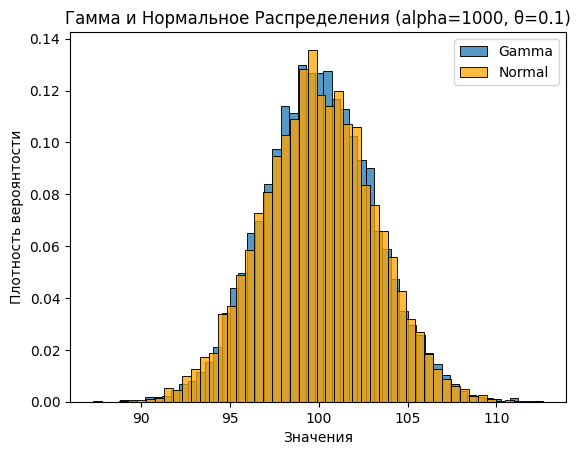

In [1306]:
gamma_samples = np.random.gamma(alpha, theta, num_samples)

mu = alpha * theta
sigma = np.sqrt(alpha * theta**2)

normal_samples = np.random.normal(mu, sigma, num_samples)

sns.histplot(gamma_samples, bins=50, kde=False, stat='density', label='Gamma')

sns.histplot(normal_samples, bins=50, kde=False, stat='density', color='orange', label='Normal')

plt.xlabel('Значения')
plt.ylabel('Плотность вероянтости')
plt.legend()
plt.title(f'Гамма и Нормальное Распределения (alpha={alpha}, θ={theta})')
plt.show()

##### Связь с распределением Эрланга

При натуральных $\theta$, $\Gamma(\alpha,\theta)$ - называется распределением Эрланга порядка $\theta$. Это распределение суммы $\theta$ независимых случайных величин с с одинаковым показательным распределением $\Gamma(\alpha, 1)$

In [1311]:
k = 5
lambda_erlang = 2
n_samples = 100000

samples_erlang = np.random.gamma(k, 1/lambda_erlang, n_samples)

In [1312]:
alpha = k
beta = lambda_erlang

samples_gamma = np.random.gamma(alpha, 1/beta, n_samples)

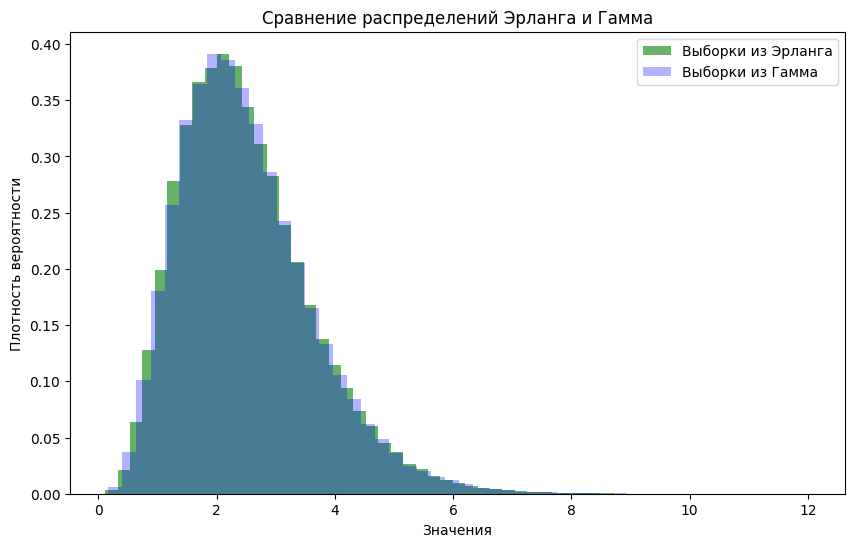

In [1313]:
plt.figure(figsize=(10, 6))
plt.hist(samples_erlang, bins=50, density=True, alpha=0.6, color='g', label='Выборки из Эрланга')
plt.hist(samples_gamma, bins=50, density=True, alpha=0.3, color='b', label='Выборки из Гамма')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.title('Сравнение распределений Эрланга и Гамма')
plt.show()

## Исследование вероятностного распределения

### Биномиальное распределение

$F(k, n, p) = P(X\leq k) = \sum\limits_{i = 0}^{k}C_{n}^{k}p^{i}(1-p)^{n - i}$  

- $\lim\limits_{x\to -\infty}F(x) = 0$ - очевидно, т.к. функция принимает неотрицательные значения  
- $\lim\limits_{x\to \infty}F(x) = \lim\limits_{x\to \infty} \sum\limits_{i = 0}^{x}C_{n}^{x}p^{i}(1-p)^{n - i} = \sum\limits_{i = 0}^{n}C_{n}^{x}p^{i}(1-p)^{n - i} = (p + (1 - p))^{n} = 1$
- Очевидно, что функция разрывна слева при целых положительных значениях, так как она дискретна, однако, функция непрерывна справа

Подсчитаем квантили:

- $\gamma = 0.1$: $F(x) = 0.1$, $\sum\limits_{i = 0}^{x}C_{n}^{x}p^{i}(1-p)^{n - i}$
- $\gamma = 0.5$: $F(x) = 0.5$, $\sum\limits_{i = 0}^{x}C_{n}^{x}p^{i}(1-p)^{n - i}$
- $\gamma = 0.9$: $F(x) = 0.9$, $\sum\limits_{i = 0}^{x}C_{n}^{x}p^{i}(1-p)^{n - i}$

А как считать?(

Зададим параметры нашего распределения

In [1322]:
n = 10
p = 0.5

Зададим значения к, для которых будем вычислять функцию распределения

In [1324]:
k_values = np.arange(0, n+1)

cdf_values = binom.cdf(k_values, n, p)

Проверим свойства функции распределения

In [1326]:
is_non_decreasing = np.all(np.diff(cdf_values) >= 0)
print("Функция неубывающая:", is_non_decreasing)

Функция неубывающая: True


Границы функции распределения:

In [1328]:
cdf_min = cdf_values[0]
cdf_max = cdf_values[-1]
print("F(k) при k → -∞:", cdf_min)
print("F(k) при k → ∞:", cdf_max)

F(k) при k → -∞: 0.0009765625
F(k) при k → ∞: 1.0


Вычисление квантилей

In [1330]:
gamma_values = [0.1, 0.5, 0.9]
quantiles = binom.ppf(gamma_values, n, p)
print(f"Квантили при γ = {gamma_values}: {quantiles}")

Квантили при γ = [0.1, 0.5, 0.9]: [3. 5. 7.]


Визуализируем наше распределение

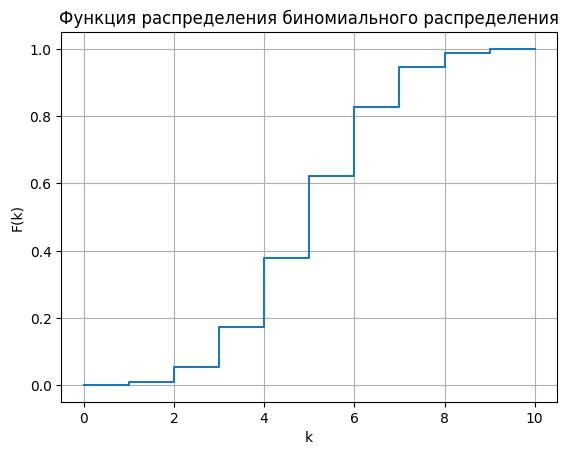

In [1332]:
plt.step(k_values, cdf_values, where='post')
plt.xlabel('k')
plt.ylabel('F(k)')
plt.title('Функция распределения биномиального распределения')
plt.grid(True)
plt.show()

### Гамма распределение

$f(x) = \frac{\theta^{\alpha}x^{\alpha-1}e^{-\theta x}}{\Gamma(\alpha)}$

$F(x) = \int\limits_{0}^{x}f(t)dt = \int\limits_{0}^{x}\frac{\theta^{\alpha}t^{\alpha-1}e^{-\theta t}}{\Gamma(\alpha)}dt = \frac{\theta^{\alpha}}{\Gamma(\alpha)}\int\limits_{0}^{x}t^{\alpha-1}e^{-\theta t}dt$

$\int\limits_{0}^{x}t^{\alpha-1}e^{-\theta t}dt = \Big{|}u = \frac{t}{\theta}, du = \frac{1}{\theta}dt\Big{|} = \int\limits_{0}^{\frac{x}{\theta}}u^{\alpha - 1}e^{-u}du = \gamma(\alpha, \frac{\theta}{x})$

$F(x) =  \frac{\theta^{\alpha}}{\Gamma(\alpha)}\int\limits_{0}^{x}t^{\alpha-1}e^{-\theta t}dt = \frac{\gamma(\alpha,\frac{\theta}{x})}{\Gamma(\alpha)}$

- $\lim\limits_{x\to -\infty}F(x) = 0$ - очевидно, т.к. функция принимает неотрицательные значения
- $\lim\limits_{x\to\infty}F(x) = \lim\limits_{x\to\infty}\frac{\gamma(\alpha,\frac{\theta}{x})}{\Gamma(\alpha)} = 1$, т.к. при $x\to\infty$: $\gamma(\alpha,\frac{\theta}{x}) = \Gamma(\alpha)$
- $\lim\limits_{x\to x+0}\frac{\gamma(\alpha,\frac{\theta}{x})}{\Gamma(\alpha)}= \lim\limits_{x\to x-0}\frac{\gamma(\alpha,\frac{\theta}{x})}{\Gamma(\alpha)} = F(x)$ - непрерывна при х > 0

Посчитаем квантили:

- $\gamma = 0.1$: $F(x) = 0.1$, $\frac{\gamma(\alpha,\frac{\theta}{x})}{\Gamma(\alpha)} = 0.1$
- $\gamma = 0.5$: $F(x) = 0.5$, $\frac{\gamma(\alpha,\frac{\theta}{x})}{\Gamma(\alpha)} = 0.5$
- $\gamma = 0.9$: $F(x) = 0.9$, $\frac{\gamma(\alpha,\frac{\theta}{x})}{\Gamma(\alpha)} = 0.9$

А как считать?(((

Зададим параметры нашего распределения

In [1343]:
alpha = 2  
theta = 2 

In [1344]:
x_values = np.linspace(0, 20, 1000)
cdf_values = gamma.cdf(x_values, alpha, scale=theta)

Проверим свойства функции распределения

In [1346]:
is_non_decreasing = np.all(np.diff(cdf_values) >= 0)
print("Функция неубывающая:", is_non_decreasing)

Функция неубывающая: True


Границы Функции распределения

In [1348]:
cdf_min = cdf_values[0]
cdf_max = cdf_values[-1]
print("F(x) при x → -∞:", cdf_min)
print("F(x) при x → ∞:", cdf_max)

F(x) при x → -∞: 0.0
F(x) при x → ∞: 0.9995006007726127


Рассчитаем значение квантилей:

In [1350]:
gamma_values = [0.1, 0.5, 0.9]
quantiles = gamma.ppf(gamma_values, alpha, scale=theta)
print(f"Квантили при γ = {gamma_values}: {quantiles}")

Квантили при γ = [0.1, 0.5, 0.9]: [1.06362322 3.35669398 7.77944034]


Визуализируем наше распределение:

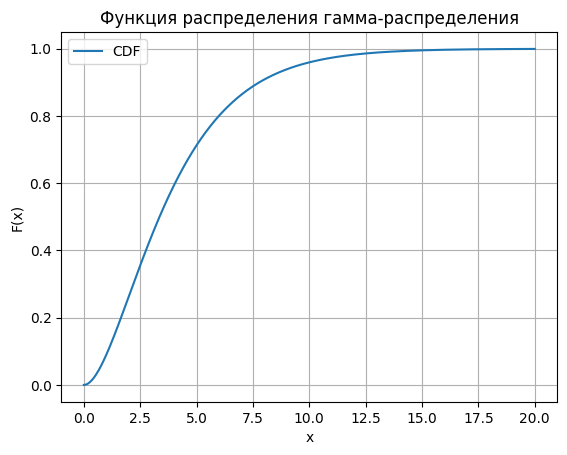

In [1352]:
plt.plot(x_values, cdf_values, label='CDF')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Функция распределения гамма-распределения')
plt.grid(True)
plt.legend()
plt.show()

## Характеристики распределений

### Биномиальное распределение

#### Математическое ожидание

$MX = \sum\limits_{x = 0}^{n}xC_{n}^{x}p^{x}(1-p)^{n-x}\ \Big{|}xC_{n}^{x} = x\frac{n!}{x!(n-x!)} = nC_{n-1}^{x-1}\Big{|}$  

$MX = n\sum\limits_{x = 1}^{n}C_{n-1}^{x-1}p^{x}(1-p)^{n-x}\ \Big{|}x' = x - 1 \rightarrow x = x' + 1\Big{|}$  

$MX = n\sum\limits_{x = 0}^{n - 1}C_{n-1}^{x}p^{x + 1}(1-p)^{n - 1 -x} = np\sum\limits_{x = 0}^{n - 1}C_{n-1}^{x}p^{x}(1-p)^{n - 1 -x} = np(p + (1 - p))^{n-1}=np$

#### Дисперсия

$DX = MX^{2} - (MX)^2 = MX^2 - n^2p^2$

$MX^2 = \sum\limits_{x = 0}^{n}x^{2}C_{n}^{x}p^{x}(1-p)^{n-x}\Big{|}xC_{n}^{x}=nC_{n-1}^{x-1}$

$MX^{2} = n\sum\limits_{x = 1}^{n}xC_{n-1}^{x-1}p^{x}(1-p)^{n-x} = n\sum\limits_{x = 0}^{n - 1}(x + 1)C_{n-1}^{x}p^{x + 1}(1-p)^{n - 1 -x} = np\sum\limits_{x = 0}^{n - 1}xC_{n-1}^{x}p^{x}(1-p)^{n - 1 -x} + np\sum\limits_{x = 0}^{n - 1}C_{n-1}^{x}p^{x }(1-p)^{n - 1 -x}$

$MX^2 = np* MX(n-1,p) + np = np(n-1)p + np = n(n-1)p^2+np$

$DX = n(n-1)p^2+np - n^2p^2 = -np^2 + np = np(1 - p)$

#### 3-й момент

$MX^{3} = \sum\limits_{x = 0}^{n}x^{3}C_{n}^{x}p^{x}(1-p)^{n-x} = np\sum\limits_{x = 0}^{n - 1}(x + 1)^{2}C_{n-1}^{x}p^{x}(1-p)^{n - 1 -x}$

$MX^3 = np(\sum\limits_{x = 0}^{n - 1}x^2C_{n-1}^{x}p^{x}(1-p)^{n - 1 -x} + 2\sum\limits_{x = 0}^{n - 1}xC_{n-1}^{x}p^{x}(1-p)^{n - 1 -x} + \sum\limits_{x = 0}^{n - 1}C_{n-1}^{x}p^{x}(1-p)^{n - 1 -x})$

$MX^3 = np(MX(n-1,p)^2+2MX(n-1,p)+1) = np + 3n(n - 1)p^{2} + n(n-1)(n-2)p^3$

#### 3-й факториальный момент

$MX(X-1)(X-2) = \sum\limits_{k = 1}^{n}k(k - 1)(k - 2)C_{n}^{k}p^{k}(1-p)^{n - k}$

$MX(X-1)(X-2) = n(n-1)(n-2)\sum\limits_{k = 3}^{n}C_{n-3}^{k - 3}p^{k}(1-p)^{n-k}\Big{|}k = k - 3\Big{|}$

$MX(X-1)(X-2) = n(n-1)(n-2)p^{3}\sum\limits_{k = 0}^{n - 3}C_{n-3}^{k}p^{k}(1-p)^{n-k-3} = n(n-1)(n-2)p^{3}$

#### Производящая функция

##### Вычисляем производящую функцию

$g_{B_{np}}(z) = \sum\limits_{m = 0}^{n}p_{m}z^{m} = \sum\limits_{m = 0}^{n}C_{n}^{m}(pz)^{m}q^{n - m} = (q + pz)^{n}$

##### Первые три факториальных момента

$MX = g'(1) = n(q + pz)^{n -1}p = np$  
$MX(X - 1) = g''(1)= n(n-1)(q+pz)^{n - 2}p^{2} = n(n-1)p^{2}$  
$MX(X - 1)(X - 2) = g'''(1)= n(n-1)(n - 2)(q+pz)^{n - 3}p^{3} = n(n-1)(n-2)p^{3}$

##### Второй центральный момент

$DX = g''(1)+g'(1) - [g'(1)]^{2}$

$DX = n(n-1)p^{2} + np - n^{2}p^{2} = np - np^{2} = np(1 - p)$

##### Вероятности $P(\xi = 0), P(\xi = 3), P(\xi \geq 3)$

$P(\xi = 0) = 0$ - из определения распределения

$P(\xi = 3) = \frac{G^{3}(0)}{3!} = \frac{n(n-1)(n-2)p^{3}q^{n - 3}}{3!} = C_{n}^{3}p^{3}q^{n - 3}$

$P(\xi\geq 3) = 1 - P(\xi < 3) = 1 - P(\xi = 2) - P(\xi = 1) = 1 - \frac{g''(1)}{2!} - \frac{g'(1)}{1!} = 1 - \frac{n(n-1)q^{n-2}p^{2}}{2} - \frac{npq^{n - 1}}{1} = 1 - C_{n}^{2}p^{2}q^{n - 2}-C_{n}^{1}pq^{n - 1}$

#### Характеристическая функция

$\phi(t)=\sum\limits_{j = 1}^{\infty}e^{itx_{j}}p_{j}$

$\phi(t)=\sum\limits_{k = 0}^{n}e^{itk}C_{n}^{k}p^{k}(1-p)^{n - k} = (e^{it}p + (1-p))^{n} = (e^{it}p + q)^{n}$

##### Подсчет моментов

$\phi_{\xi}^{(k)}(0)=i^{k}MX^{k}$

###### 1-ый момент

$\phi_{\xi}^{(1)}(0) = n(e^{it}p+q)^{n - 1}pe^{it}i\Big{|}^{0}$

MX = np

###### 2-ой момент

$\phi_{\xi}^{(2)}(0) = n(e^{it}p+q)^{n - 1}pe^{it}i^{2} + n(n - 1)(e^{it}p+q)^{n - 2}(pe^{it}i)^{2}\Big{|}^{0}$

$MX^{2} = np + n(n-1)p^{2}$

###### 3-ий момент

$\phi_{\xi}^{(3)}(0) = n(n-1)(e^{it}p+q)^{n - 1}(pe^{it})^{2}i^{3} + n(e^{it}p+q)^{n - 1}pe^{it}i^{3} + n(n - 1)(n - 2)(e^{it}p+q)^{n - 2}(pe^{it}i)^{3} + 2n(n - 1)(e^{it}p+q)^{n - 2}(pe^{it})^{2}(i)^{3}$

$MX^{3} = n(n - 1)p^2 + np + n(n-1)(n-2)p^{3}+2n(n-1)p^{2} = np + 3n(n-1)p{2}+n(n-1)(n-2)p^{3}$

### Гамма распределение

#### Математическое ожидание

Используем формулировку гамма распределения с параметрами $\alpha,\ \beta$

$MX = \frac{1}{\Gamma(\alpha)\beta^{\alpha}}\int\limits_{0}^{\infty}e^{-\frac{t}{\beta}}t^{\alpha}dt$ 

Вспомним, что $\alpha\Gamma(\alpha) = \Gamma(\alpha + 1)$

$MX = \alpha\beta \frac{1}{\Gamma(\alpha)\beta^{\alpha + 1}}\int\limits_{0}^{\infty}e^{-\frac{t}{\beta}}t^{\alpha}dt$

Заметим, что $\frac{1}{\Gamma(\alpha)\beta^{\alpha + 1}}\int\limits_{0}^{\infty}e^{-\frac{t}{\beta}}t^{\alpha}dt = \int\Gamma(\alpha + 1, \beta) = 1$

$MX = \alpha\beta$ или $\frac{\alpha}{\theta}$

#### Дисперсия

DX = MX^2 - (MX)^2

$MX^2 = \frac{1}{\Gamma(\alpha)\beta^{\alpha}}\int\limits_{0}^{\infty}e^{-\frac{t}{\beta}}t^{\alpha + 1}dt$

$MX^{2} = \alpha(\alpha + 1)\beta^2 \frac{1}{\Gamma(\alpha + 1)\beta^{\alpha+2}}\int\limits_{0}^{\infty}e^{-\frac{t+1}{\beta}}t^{\alpha + 1}dt = \alpha(\alpha + 1)\beta^2$

$DX = \alpha(\alpha + 1)\beta^2 - (\alpha\beta)^2 = \alpha\beta^2$

#### 3-й момент

$MX^3 = \frac{1}{\Gamma(\alpha)\beta^{\alpha}}\int\limits_{0}^{\infty}e^{-\frac{t+2}{\beta}}t^{\alpha + 2}dt$

$MX^{3} = \alpha(\alpha + 1)(\alpha + 2)\beta^3 \frac{1}{\Gamma(\alpha + 2)\beta^{\alpha+2}}\int\limits_{0}^{\infty}e^{-\frac{t+2}{\beta}}t^{\alpha + 2}dt = \alpha(\alpha + 1)(\alpha + 2)\beta^3$

#### 3-й Факториальный момент

$MX(X-1)(X - 2) = M(X^{3}-3X^{2}+2X) = MX^{3}-3MX^2+2MX$

$MX(X-1)(X - 2) = \alpha(\alpha + 1)(\alpha + 2)\beta^3 - 3\alpha(\alpha + 1)\beta^2 + 2\alpha\beta$

#### Характеристическая функция

$\phi_{\xi}(t) = \int\limits_{0}^{\infty}e^{itx}f_{\xi}(x)dx = \int\limits_{0}^{\infty}e^{itx}\frac{\theta^{\alpha}x^{\alpha - 1}e^{-\theta x}}{\Gamma(\alpha)}dx$

$\phi_{\xi}(t) = \frac{\theta^{\alpha}}{\Gamma(\alpha)}\int\limits_{0}^{\infty}e^{-x(\theta - it)}x^{\alpha - 1}dx$

Заметим, что:

$\int\limits_{0}^{\infty}e^{-x(\theta - it)}x^{\alpha - 1}dx = \frac{1}{(\theta - it)^{\alpha}}\int\limits_{0}^{\infty}e^{-y}y^{\alpha - 1}dy = \frac{\Gamma(\alpha)}{(\theta - it)^{\alpha}}$

Тогда:  
$\phi_{\xi}(t) = (\frac{\theta}{\theta-it})^{-\alpha} = (1-\frac{it}{\theta})^{-\alpha}$

##### Подсчет моментов

$\phi_{\xi}^{(k)}(0)=i^{k}MX^{k}$

###### 1-ый момент

$\phi_{\xi}^{(1)}(0) = -\alpha{(1-\frac{it}{\theta})^{-\alpha-1}}*-\frac{i}{\theta}\Big{|}^{0}$

$MX = \frac{\alpha}{\theta}$

###### 2-ой момент

$\phi_{\xi}^{(2)}(0) = -\alpha(-\alpha - 1){(1-\frac{it}{\theta})^{-\alpha-2}}*(-\frac{i}{\theta})^{2}\Big{|}^{0}$

$MX^{2} = \frac{\alpha(\alpha + 1)}{\theta^{2}}$

###### 3-ий момент

$\phi_{\xi}^{(3)}(0) = -\alpha(-\alpha - 1)(-\alpha - 2){(1-\frac{it}{\theta})^{-\alpha-3}}*(-\frac{i}{\theta})^{3}\Big{|}^{0}$

$MX^{3} = \frac{\alpha(\alpha + 1)(\alpha + 2)}{\theta^{3}}$

## Свертка распределений

### Биномиальное распределение

#### Сумма двух биномиальных распределений

Если $X_{1} \ и\ X_{2}$ - независимые случайные величины, подчиняющиеся биномиальному распределению с параметрами $n_{1}, p$ и $n_{2},p$ соответственно, то производящая функция случайной величины $X_{1} + X_{2}$ имеет вид $(q+pz)^{n_{1}}(q+pz)^{n_{2}} = (q+pz)^{n_{1}+n_{2}}$. Следовательно, случайная величина $X_{1} + X_{2}$ имеет биномиальное распределение с параметрами $n_{1}+n_{2}, p$.  
Это свойство становится очевидным, если в качестве интерпретации случайной величины использовать наблюдаемое число исходов E с постоянной вероятностью p в последовательность из $n_1 + n_2$ независимых испытаний

Продемострируем справедливость данного рассуждения на практике

In [1440]:
n1, n2 = 10, 15
p = 0.3

X1 = np.random.binomial(n1, p, 10000)
X2 = np.random.binomial(n2, p, 10000)

X_sum = X1 + X2

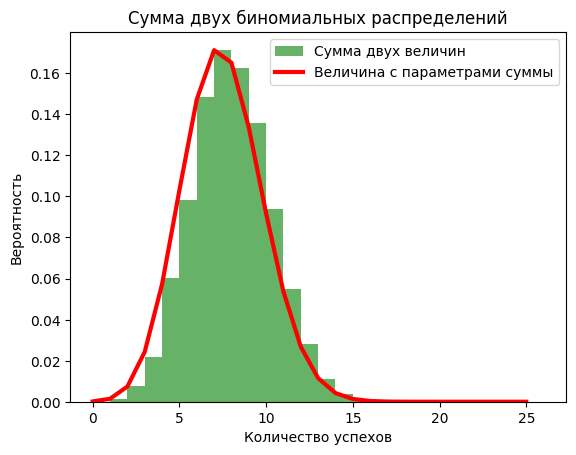

In [1441]:
n_sum = n1 + n2
theoretical_probs = binom.pmf(range(n_sum + 1), n_sum, p)


plt.hist(X_sum, bins=range(n_sum + 2), density=True, alpha=0.6, color='g', label='Сумма двух величин')

plt.plot(range(n_sum + 1), theoretical_probs, 'r-', lw=3, label='Величина с параметрами суммы')

plt.xlabel('Количество успехов')
plt.ylabel('Вероятность')
plt.legend()
plt.title('Сумма двух биномиальных распределений')
plt.show()

#### Сумма n (в том числе и 3) биномиальных величин

Заметим, что аналогично второму пункту, сумму нескольких биномиальных распределений с различными значениями параметра n, но единым значением параметра p можно представить как биномиальную случайную величину, у которой мы наблюдаем число исходов E с постоянной вероятностью p и количеством исходов $n_{1} + n_{2} + ... n_{n}$

Продемонстрируем на практике:

In [1445]:
n_values = [5, 10, 15, 20]  

samples = [np.random.binomial(n, p, 10000) for n in n_values]

sum_samples = np.sum(samples, axis=0)

In [1446]:
N = np.sum(n_values)
theoretical_probs = binom.pmf(range(N + 1), N, p)

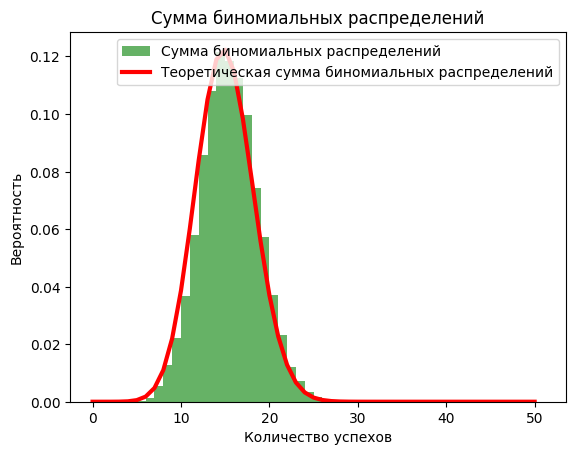

In [1447]:
plt.hist(sum_samples, bins=range(N + 2), density=True, alpha=0.6, color='g', label='Сумма биномиальных распределений')

plt.plot(range(N + 1), theoretical_probs, 'r-', lw=3, label='Теоретическая сумма биномиальных распределений')

plt.xlabel('Количество успехов')
plt.ylabel('Вероятность')
plt.legend()
plt.title('Сумма биномиальных распределений')
plt.show()

### Гамма распределение

Сумма любого числа независимых гамма-распределенных случайных величин с одинаковым параметром масштаба $\theta$ и параметрами формы $\alpha_{1},\alpha_{2},...,\alpha_{n}$ также подчиняются гамма-распределению с параметрами $\alpha = \alpha_{1}+\alpha_{2}+...+\alpha_{n},\ \theta$

Доказательство:

Рассмотрим, когда $\xi\ и\ \eta$ являются однопараметрическими гамма-распределенными случайными величинами с параметрами $\alpha\ и\ \beta$ соответственно ($\alpha > 0, \beta > 0$), т.е. $\theta = 1$. Покажем, что если $\xi\ и\ \eta$ независимые случайные величины, то случайная величина $\tau = \xi + \eta$ подчиняется гамма распределению с параметром $\alpha + \beta$

Пусть $\xi \in \gamma(\alpha,1),\ \beta \in gamma (\beta,1)$. Их функции плотностей распределения соответственно равны: $$p_\xi(x) = \frac{1}{\Gamma(\alpha)}x^{\alpha-1}e^{-x}, \quad p_\eta(x) = \frac{1}{\Gamma(\beta)}x^{\beta-1}e^{-x}, \quad x > 0$$

Поскольку $\xi$ и $\eta$ независимы, совместная плотность распределения равна произведению функций плотностей сомножителей: $p(x, y) = p_\xi(x)p_\eta(y)$ и функция плотности суммы вычисляется с помощью свертки:

$$p_{\xi + \eta}(z) = \int_{-\infty}^{+\infty} p(x, z-x) \, dx = \int_{-\infty}^{+\infty} p_\xi(x) p_\eta(z-x) \, dx.$$

Подставляя в последнюю формулу выражения для плотностей составляющих, получим:
$$p_{\xi + \eta}(z) = \int_{-\infty}^{+\infty} \frac{1}{\Gamma(\alpha)} x^{\alpha-1} e^{-x} I_{(0, \infty)}(x) \frac{1}{\Gamma(\beta)} (z-x)^{\beta-1} e^{-(z-x)} I_{(0, \infty)}(z-x) \, dx,$$
где $I_{(0, \infty)}$ — индикаторная функция множества $D \subseteq \mathbb{R}^1$ определяемая соотношением:
$I_D(x) = 
\begin{cases} 
1, & x \in D, \\
0, & x \notin D.
\end{cases}$

Отсюда следует, что $I_{(0, \infty)}(z-x) = 
\begin{cases}
1, & 0 \le z-x < +\infty, \\
0, & z - x < 0 
\end{cases} = 
\begin{cases}
1, & x \le z, \\
0, & x > z.
\end{cases}$

Таким образом, получаем:  
$$p_{\xi + \eta}(z) = \int_{0}^{z} \frac{1}{\Gamma(\alpha)} x^{\alpha-1} e^{-x} \frac{1}{\Gamma(\beta)} (z-x)^{\beta-1} e^{-(z-x)} \, dx =$$

$$=\frac{1}{\Gamma(\alpha) \Gamma(\beta)} \int_{0}^{z} x^{\alpha-1} (z-x)^{\beta-1} e^{-z} \, dx = \left| x = zu, \, dx = z \, du \right| = \frac{1}{\Gamma(\alpha) \Gamma(\beta)} \int_{0}^{1} (zu)^{\alpha-1} (z-zu)^{\beta-1} e^{-z} z \, du =$$

$$=\frac{z^{\alpha + \beta - 1} e^{-z}}{\Gamma(\alpha) \Gamma(\beta)} \int_{0}^{1} u^{\alpha-1} (1-u)^{\beta-1} \, du = \frac{z^{\alpha + \beta - 1} e^{-z} \Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha) \Gamma(\beta) \Gamma(\alpha + \beta)}.$$

Поэтому, функция плотности распределения суммы $\eta + \xi$ равная $$p_{\xi+\eta}(z)=\frac{1}{\Gamma(\alpha+\beta)}z^{(\alpha+\beta)-1}e^{-z}$$

соответствует гамма распределению с параметром $\alpha + \beta$ т.е. $\xi+\eta \in\Gamma(\alpha+\beta,1)$

Из свойства:
- Если случайная величина имеет гамма-распределение $\xi\in\Gamma(\alpha,\theta),\ то\ c\xi\in\Gamma(\alpha,\frac{\theta}{c})$, в частности $\theta\xi\in\Gamma(\alpha,1)$

Следует, что $\xi_{1} = \frac{1}{\theta}\xi\in\Gamma(\alpha,\theta)\ \  и\  \ \eta_{1}= \frac{1}{\theta}\eta\in\Gamma(\beta,\theta)$
Тогда случайная величина $\eta_{1}+\xi_{1}=\frac{1}{\theta}(\eta+\xi)\in\Gamma(\alpha+\beta,\theta)$

По индукции можем доказать, что сумма любого числа независимых гамма-распределенных случайных величин с одинаковым параметром масштаба $\theta$ и параметрами формы $\alpha_{1},\alpha_{2},...,\alpha_{n}$ также подчиняются гамма-распределению с параметрами $\alpha = \alpha_{1}+\alpha_{2}+...+\alpha_{n},\ \theta$

P.s. Пусть верно для n, тогда на n + 1 шаге представим нашу сумму в 2 случайных величины (из n штук и 1 штуки, и ручками покажем аналогично верхнему доказательству)

Продемонстрируем работоспособность данного правила на примере:

Зададим параметры наших распределений и количество экспериментов:

In [1466]:
alpha1, alpha2, alpha3 = 2, 3, 4
beta = 2

n_samples = 100000

In [1467]:
samples1 = np.random.gamma(alpha1, 1/beta, n_samples)
samples2 = np.random.gamma(alpha2, 1/beta, n_samples)
samples3 = np.random.gamma(alpha3, 1/beta, n_samples)

samples_sum = samples1 + samples2 + samples3

Зададим распределение суммы

In [1469]:
alpha_sum = alpha1 + alpha2 + alpha3

x = np.linspace(0, np.max(samples_sum), 1000)
gamma_pdf = gamma.pdf(x, alpha_sum, scale=1/beta)

Построим график

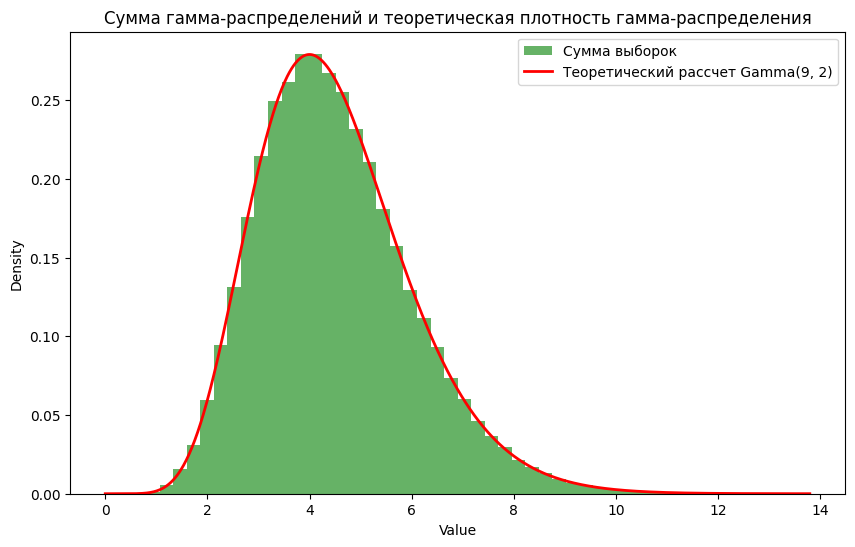

In [1471]:
plt.figure(figsize=(10, 6))
plt.hist(samples_sum, bins=50, density=True, alpha=0.6, color='g', label='Сумма выборок')
plt.plot(x, gamma_pdf, 'r-', lw=2, label=f'Теоретический рассчет Gamma({alpha_sum}, {beta})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.title('Сумма гамма-распределений и теоретическая плотность гамма-распределения')
plt.show()

### Сумма биномиального и Гамма распределений

Рассмотрим сумму дискретной и непрерывной независимых случайных величин $\mathscr{L}_{d} + \mathscr{L}_{c}$.  
Выразим функцию распределения суммы случайных величин $\mathscr{L}_{d} + \mathscr{L}_{c}$ через функцию распределения случайной величины $\mathscr{L}_{c}$, пользуясь независимостью случайных величин $\mathscr{L}_{d}$ и $\mathscr{L}_{c}$, и законом распределения $\mathscr{L}_{d}$:
$F_{\mathscr{L}_{d} + \mathscr{L}_{c}}(x) = P(\mathscr{L}_{d} + \mathscr{L}_{c} < x) = \sum\limits_{k = 0}^{n}P(\mathscr{L}_{c} \leq x - k,\ \mathscr{L}_{d} = k) = \sum\limits_{k = 0}^{n}P(\mathscr{L}_{c} \leq x - k)P(\mathscr{L}_{d} = k)$


Продемонстрируем на практике:

In [1475]:
n = 10    
p = 0.3
k = 2.0   
theta = 2.0  

X = np.random.binomial(n, p, 10000)
Y = np.random.gamma(k, theta, 10000)

In [1476]:
Z = X + Y

x_range = np.linspace(0, np.max(Z), 1000)
binom_pmf = binom.pmf(np.arange(0, np.max(Z)), n, p)
gamma_pdf = gamma.pdf(x_range, k, scale=theta)

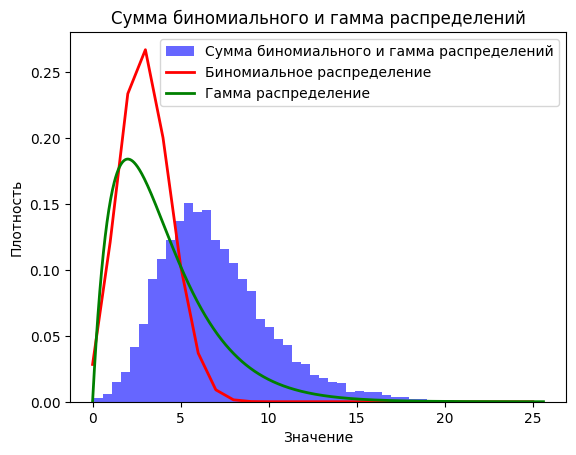

In [1477]:
plt.hist(Z, bins=50, density=True, alpha=0.6, color='b', label='Сумма биномиального и гамма распределений')

plt.plot(np.arange(0, np.max(Z)), binom_pmf, 'r-', lw=2, label='Биномиальное распределение')
plt.plot(x_range, gamma_pdf, 'g-', lw=2, label='Гамма распределение')

plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.title('Сумма биномиального и гамма распределений')
plt.show()

Аппроксимируем нормальным распределением

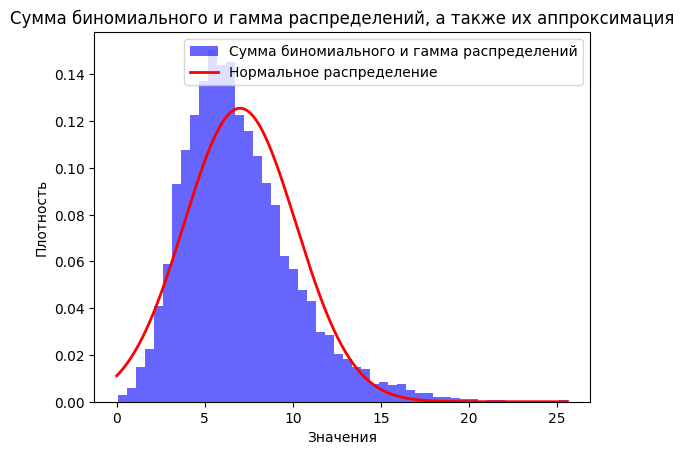

In [1479]:
mu = n*p + k*theta
sigma = np.sqrt(n*p*(1-p) + k*theta**2)

x_range = np.linspace(0, np.max(Z), 1000)
normal_pdf = norm.pdf(x_range, mu, sigma)

plt.hist(Z, bins=50, density=True, alpha=0.6, color='b', label='Сумма биномиального и гамма распределений')

plt.plot(x_range, normal_pdf, 'r-', lw=2, label='Нормальное распределение')

plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.legend()
plt.title('Сумма биномиального и гамма распределений, а также их аппроксимация')
plt.show()

## Использованные материалы

С гугл диска из беседы ТВиМС:
1. Ивченко, Медведев "Введение в математическую статистику"
2. Norman L. Johnson, Samuel Kotz, N. Balakrishnan - Continuous Univariate Distributions, Vol. 1 (Wiley Series in Probability and Statistics)-Wiley-Interscience (1994)
3. Norman L. Johnson, etc - Univariate Discrete Distributions, Third Edition-Wiley-Interscience (2005)

А также:
1. www.youtube.com/@GetSomeMath
2. https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5
3. https://translated.turbopages.org/proxy_u/en-ru.ru.8d076b8b-66656230-8a6654f7-74722d776562/https/en.wikipedia.org/wiki/Binomial_distribution
4. https://translated.turbopages.org/proxy_u/en-ru.ru.24ebc951-66657415-933f6875-74722d776562/https/psychology.fandom.com/wiki/Binomial_distribution#Cumulative_distribution_function
5. https://www.resolventa.ru/data/mfti/theorver/joint_distributions.pdf

И много чего еще